<h2 style="color:crimson">Respuestas tarea 3</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.



In [29]:
from requests_html import HTMLSession
import pandas as pd

In [30]:
#se esctibe la url a usar
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [32]:
#se busca el primer id de la pagina
divpage = r.html.find("div[id='dlpage']", first=True)


In [33]:
#se busca los dt, y se guarda como una lista
papers_links = divpage.find("dt")
#len(papers_links)
#papers_links[5].text

In [34]:
#se busca los dd, y se guarda como una lista
papers_titles = divpage.find("dd")
#len(papers_titles)

In [7]:
#url = "https://arxiv.org/abs/2002.12321"
#with HTMLSession() as sess:
#    s = sess.get(url)

#divpapers = s.html.find("div[id='content']", first=True)
#divpapers.text

In [8]:
#papers_descriptor=divpapers.find("blockquote[class='abstract mathjax']")
#len(papers_descriptor)

In [9]:
#date_papers=divpapers.find("div[class='dateline']")
#len(date_papers)

In [35]:
#se genera un arreglo para el titulo, la url, el resumen y la fecha de cada artículo

values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    with HTMLSession() as sess:
        s = sess.get(abstract_url)
    divpapers = s.html.find("div[id='content']", first=True)
    papers_descriptor=divpapers.find("blockquote[class='abstract mathjax']")
    date_papers=divpapers.find("div[class='dateline']")
    
    for descriptor_secc,date_secc in zip(papers_descriptor,date_papers):
    
        descriptor = descriptor_secc.find("blockquote[class='abstract mathjax']", first=True).text  
        date = date_secc.find("div[class='dateline']",first=True).text[1:-1]
    
    
    values.append([title, abstract_url, descriptor,date])

In [36]:
#se genera el panda DataFrame con el arreglo anterior 
df_values = pd.DataFrame(values, columns=["title", "url", "Abstract", "Submitted"])
df_values.head()

,title,url,Abstract,Submitted
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/abs/2002.12928,Abstract: Reinforcement learning (RL) algorith...,Submitted on 28 Feb 2020
1,Title: The estimation error of general first o...,https://arxiv.org/abs/2002.12903,Abstract: Modern large-scale statistical model...,Submitted on 28 Feb 2020
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/abs/2002.12880,Abstract: The translation equivariance of conv...,Submitted on 25 Feb 2020
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/abs/2002.12826,Abstract: Molecule generation is a challenging...,Submitted on 28 Feb 2020
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/abs/2002.12640,Abstract: We characterize the behavior of inte...,Submitted on 28 Feb 2020


----

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>



In [37]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage as av
import time
import numpy as np

In [38]:
#ALPHA_VANTAGE_KEY= "F7K5D1UJY13BSLI3"
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
ALPHA_VANTAGE_KEY= 'F7K5D1UJY13BSLI3'

avkey = ALPHA_VANTAGE_KEY

In [39]:
#se entra a la url deseada, y se habre el csv
curr_list_url = "https://www.alphavantage.co/physical_currency_list/"
curr_list = pd.read_csv(curr_list_url).set_index("currency name")
curr_list.head()


,currency code
currency name,
United Arab Emirates Dirham,AED
Afghan Afghani,AFN
Albanian Lek,ALL
Armenian Dram,AMD
Netherlands Antillean Guilder,ANG


In [40]:
#se imprime el listado de las monedas y el código de ellas
from_curr = "United States Dollar"
curr_list.filter([from_curr], axis=0)

currencies = ["Mexican Peso", "Euro", "Brazilian Real", "Argentine Peso", "Swiss Franc"]
target_curr = curr_list.filter(currencies, axis=0)

target_curr

,currency code
currency name,
Mexican Peso,MXN
Euro,EUR
Brazilian Real,BRL
Argentine Peso,ARS
Swiss Franc,CHF


In [41]:
#se genera un arreglo donde se guarden los precios historicos de cada moneda en Dolares
r=[]
for i in range(0,5):
    intraday2 = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": target_curr["currency code"].values[i],
        "apikey": avkey,
        "outputsize": "full"
        
    }

    r.append(requests.get(base_url, params=intraday2))
    time.sleep(30)

r


[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [42]:
#se genera una base con precio historico de cada moneda
data_1 = r[0].json()
data_2 = r[1].json()
data_3 = r[2].json()
data_4 = r[3].json()
data_5 = r[4].json()



In [43]:
#Se guarda el precio historico del cierre de cada moneda con las fechas  

df_data_1 = pd.DataFrame(data_1["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_1=df_data_1['4. close']

df_data_2 = pd.DataFrame(data_2["Time Series FX (Daily)"], dtype=float).T.sort_index()
df_2=df_data_2['4. close']

df_data_3 = pd.DataFrame(data_3["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_3=df_data_3['4. close']

df_data_4 = pd.DataFrame(data_4["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_4=df_data_4['4. close']

df_data_5 = pd.DataFrame(data_5["Time Series FX (Daily)"],dtype=float).T.sort_index()
df_5=df_data_5['4. close']


In [44]:
#los precios historicos de cada moneda se agrupan en un panda DataFrame

df_all=pd.merge(df_1, df_2, right_index=True, left_index=True)
df_all_1=pd.merge(df_all, df_3, right_index=True, left_index=True)
df_all_2=pd.merge(df_all_1, df_4, right_index=True, left_index=True)
df_all_3=pd.merge(df_all_2, df_5, right_index=True, left_index=True)
df_all_3.columns = ['MXN', 'EUR', 'BRL', 'ARS', 'CHF']
df_all_3.loc['2014-11-24':'2014-11-28',:]


,MXN,EUR,BRL,ARS,CHF
2014-11-24,0.0732,1.2438,0.3920,0.1169,1.0342
2014-11-25,0.0731,1.2473,0.3955,0.1169,1.0370
2014-11-26,0.0728,1.2507,0.3995,0.1168,1.0401
2014-11-27,0.0726,1.2458,0.3947,0.1169,1.0363
2014-11-28,0.0717,1.2451,0.3891,0.1168,1.0351



----
3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)



In [45]:
import seaborn as sns

In [46]:
#se genera el Data Frame de la correlación
df_all_3.corr()

,MXN,EUR,BRL,ARS,CHF
MXN,1.000000,0.179794,0.576698,0.805006,0.535283
EUR,0.179794,1.000000,0.274917,-0.048239,0.394269
BRL,0.576698,0.274917,1.000000,0.673643,0.418526
ARS,0.805006,-0.048239,0.673643,1.000000,0.392408
CHF,0.535283,0.394269,0.418526,0.392408,1.000000


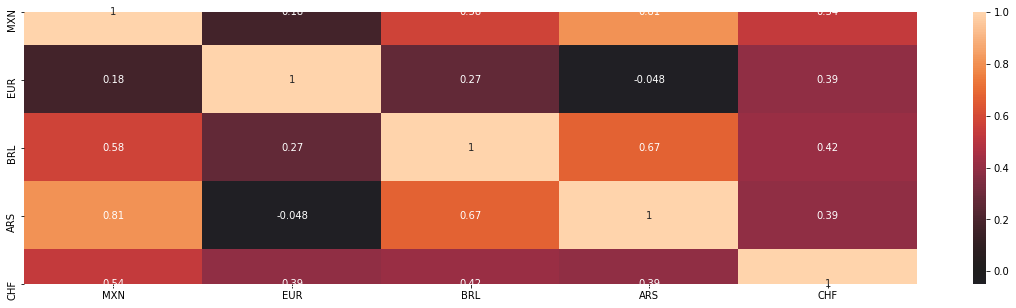

In [47]:
#se genera el mapa de calor
sns.heatmap(df_all_3.corr(),center=0,annot=True)


---

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>



In [48]:
#se genera la correlación con venta de 30 días de cada moneda 
df=df_all_3.rolling(30).corr()
df

MXN       EUR       BRL       ARS       CHF
2014-11-07 MXN       NaN       NaN       NaN       NaN       NaN
           EUR       NaN       NaN       NaN       NaN       NaN
           BRL       NaN       NaN       NaN       NaN       NaN
           ARS       NaN       NaN       NaN       NaN       NaN
           CHF       NaN       NaN       NaN       NaN       NaN
...                  ...       ...       ...       ...       ...
2020-03-01 MXN  1.000000 -0.340049  0.718202  0.533992 -0.538785
           EUR -0.340049  1.000000  0.317475  0.540354  0.943997
           BRL  0.718202  0.317475  1.000000  0.901029  0.064137
           ARS  0.533992  0.540354  0.901029  1.000000  0.295970
           CHF -0.538785  0.943997  0.064137  0.295970  1.000000

[8265 rows x 5 columns]

In [49]:
#sólo se toma la correlación con respecto a MXN
df_ind=df.xs('MXN', level=1)
df_ind

,MXN,EUR,BRL,ARS,CHF
2014-11-07,NaN,NaN,NaN,NaN,NaN
2014-11-09,NaN,NaN,NaN,NaN,NaN
2014-11-10,NaN,NaN,NaN,NaN,NaN
2014-11-11,NaN,NaN,NaN,NaN,NaN
2014-11-12,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-02-25,1.0,-0.209582,0.152762,0.018184,-0.341759
2020-02-26,1.0,-0.132666,0.332192,0.146621,-0.273137
2020-02-27,1.0,-0.196531,0.504148,0.304529,-0.355744
2020-02-28,1.0,-0.268271,0.627480,0.426425,-0.451384


In [50]:
#Se quita la columna MXN 
df_fin=df_ind.drop(['MXN'], axis=1)
df_fin

,EUR,BRL,ARS,CHF
2014-11-07,NaN,NaN,NaN,NaN
2014-11-09,NaN,NaN,NaN,NaN
2014-11-10,NaN,NaN,NaN,NaN
2014-11-11,NaN,NaN,NaN,NaN
2014-11-12,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-02-25,-0.209582,0.152762,0.018184,-0.341759
2020-02-26,-0.132666,0.332192,0.146621,-0.273137
2020-02-27,-0.196531,0.504148,0.304529,-0.355744
2020-02-28,-0.268271,0.627480,0.426425,-0.451384


In [51]:
#se imprime el data frame con los datos que se piden
df_day=df_fin.loc['2015-03-19':'2015-03-24',:]
df_day


,EUR,BRL,ARS,CHF
2015-03-19,0.900941,0.870440,0.835029,0.916637
2015-03-20,0.874866,0.815453,0.762308,0.903594
2015-03-22,0.866783,0.789977,0.726098,0.900547
2015-03-23,0.835823,0.728781,0.643129,0.885424
2015-03-24,0.801267,0.671188,0.560149,0.877682



---

5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)


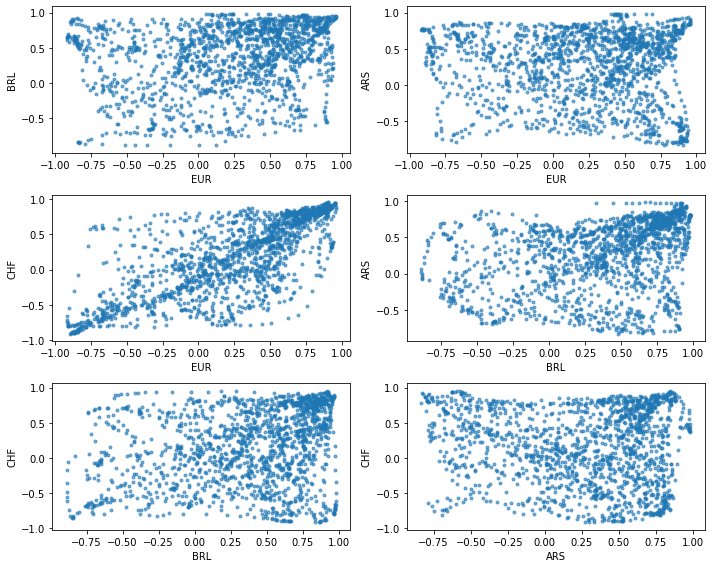

In [52]:
#se genera las figuras de correlación con cada moneda

fig, axes= plt.subplots(nrows=3, ncols=2, figsize=(10,8))
axes[0,0].scatter(df_fin['EUR'],df_fin['BRL'],marker='.',alpha=0.6)
axes[0,0].set_xlabel('EUR')
axes[0,0].set_ylabel('BRL')
axes[0,1].scatter(df_fin['EUR'],df_fin['ARS'],marker='.',alpha=0.6)
axes[0,1].set_xlabel('EUR')
axes[0,1].set_ylabel('ARS')
axes[1,0].scatter(df_fin['EUR'],df_fin['CHF'],marker='.',alpha=0.6)
axes[1,0].set_xlabel('EUR')
axes[1,0].set_ylabel('CHF')
axes[1,1].scatter(df_fin['BRL'],df_fin['ARS'],marker='.',alpha=0.6)
axes[1,1].set_xlabel('BRL')
axes[1,1].set_ylabel('ARS')
axes[2,0].scatter(df_fin['BRL'],df_fin['CHF'],marker='.',alpha=0.6)
axes[2,0].set_xlabel('BRL')
axes[2,0].set_ylabel('CHF')
axes[2,1].scatter(df_fin['ARS'],df_fin['CHF'],marker='.',alpha=0.6)
axes[2,1].set_xlabel('ARS')
axes[2,1].set_ylabel('CHF')

fig.tight_layout()

¿Encuentras algún patrón en alguna combinación?  En la combinación de EUR y CHF, la correlación es casi líneal. En cada combinación existe una correlación muy marcada excepto en ARS y CHF donde hay mayor disperción de la información.


---

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)


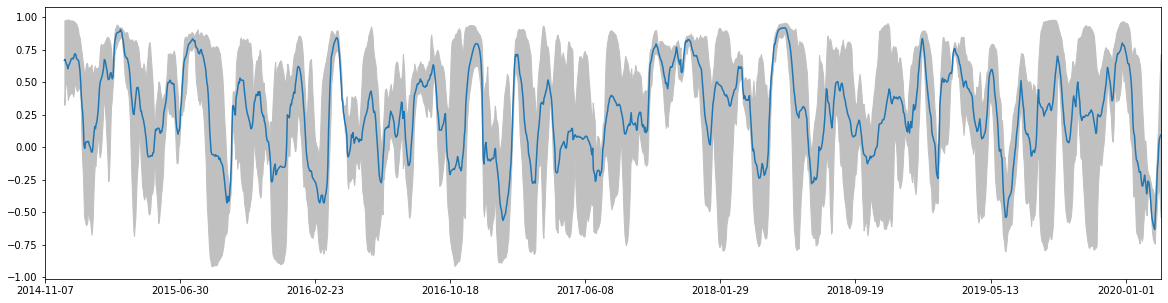

In [53]:
#se genera la figura que representa la correlación promedio entre todas las monedas con respecto a MXN, 
#con una banda de maximos y minimos.

plt.rcParams["figure.figsize"]=(20,5)
df_fin.mean(axis=1).plot()
plt.fill_between(x=df_fin.index,y1=df_fin.min(axis=1),y2=df_fin.max(axis=1),color='silver')